# Week-1

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [1]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [43]:
import matplotlib.pyplot as plt
X.shape[0]


100

## Problem-2

How many features does the dataset have?

In [8]:
# Solution
print(X.shape[1])

784


## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library. 

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

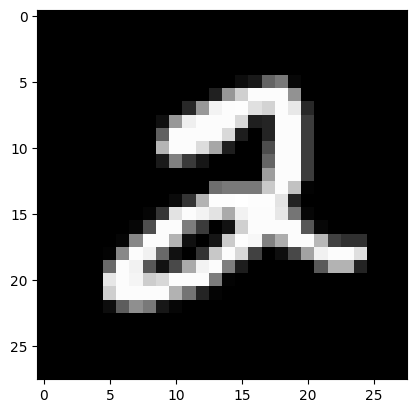

In [41]:
# Solution
import matplotlib.pyplot as plt
import random
img = X[random.randint(0,99)].reshape(28, 28)
plt.imshow(img, cmap = 'gray')

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.


In [5]:
# Solution
def center(X):
    return X - X.mean(axis = 0)
X_prime = center(X)

0.23242174456564685


## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.


In [34]:
# Solution
def covariance(X):
    return X.T @ X / X.shape[0]

C = covariance(X_prime)


## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

$$

In [24]:
# Solution
def compute_pc(C):
    d = C.shape[0]
    eigval, eigvec = np.linalg.eigh(C)
    w_1, w_2 = eigvec[:, -1], eigvec[:, -2]
    assert w_1.shape[0] == w_2.shape[0] == d
    return w_1, w_2

w_1, w_2 = compute_pc(C)
w_1.shape

(784,)

## Problem-7

Visualize the first principal component as an image.

Eigen vector in itself seems like a image , if directly shown seems like an image 

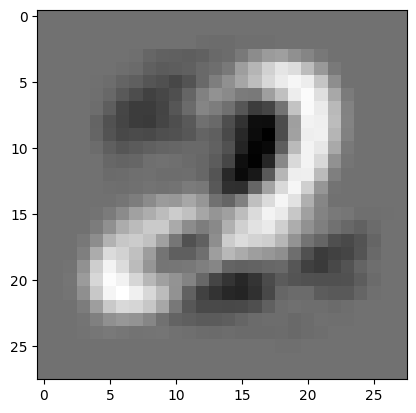

In [33]:
# Solution
w_1_image = w_1.reshape(28, 28)
plt.imshow(w_1_image, cmap = 'gray')


## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

this just checks how many PC are needed to make it above 95% , which is sum of taken eigen vector / sum of all eigen vector

In [30]:
# Solution
def choose_k(C):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= 0.95:
            return k + 1
    return len(eigval)

print(choose_k(C))

53


## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



Here , all we are doing is reducing the size of the test image while still retaining its data , that is why we are multiplying it with a d cross d matrix , so its size becomes smaller

coeff = test_image @ W -> this is the image lowered to lower dimension 

return W@coeff returns the orignal image

more then eigen values we take , more variance we have in the data , more the better reconstruction occurs , generally 95% is considered enough for reconstruction

eigenvector are the columns of the eigenvec matrix , tahts why we are doing W = eigenvec[:,-K:]

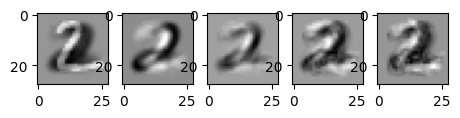

In [32]:
# Solution
def reconstruct(C, test_image, thresh):
    eigval, eigvec = np.linalg.eigh(C)
    eigval = list(reversed(eigval))
    tot = sum(eigval)
    K = len(eigval)
    for k in range(len(eigval)):
        if sum(eigval[: k + 1]) / tot >= thresh:
            K = k + 1
            break
    W = eigvec[:, -K: ]
    coeff = test_image @ W
    return W @ coeff

# Original mean subtracted image
test_image = np.float64(test_image) - X.mean(axis = 0)
plt.subplot(1, 6, 1)
plt.imshow(test_image.reshape(28, 28), cmap = 'gray')
# 0.20
recon_image = reconstruct(C, test_image, 0.20)
plt.subplot(1, 6, 2)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.5
recon_image = reconstruct(C, test_image, 0.50)
plt.subplot(1, 6, 3)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.80
recon_image = reconstruct(C, test_image, 0.80)
plt.subplot(1, 6, 4)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')
# 0.95
plt.subplot(1, 6, 5)
recon_image = reconstruct(C, test_image, 0.95)
plt.imshow(recon_image.reshape(28, 28), cmap = 'gray')


So in the end , all PCA does is reduce the dimensionality of a given sample , given that we already have had many samples for creating the model , after reducing the dimnesionality , we may reconstruct it. Also reduction is done according to us , we may capture as much variance as we want.